In [1]:
import pandas as pd

In [2]:
db = pd.read_excel('Superfam_Databasewku.xlsx',
                   sheet_name='2014 Customer Survey',
                   keep_default_na=False)
db.columns = db.iloc[1]
db

1,Region,Quality,Ease of Use,Price,Service
0,,,,,
1,Region,Quality,Ease of Use,Price,Service
2,NA,4,1,3,4
3,NA,4,4,4,5
4,NA,4,5,4,3
...,...,...,...,...,...
197,China,4,4,3,3
198,China,4,4,3,2
199,China,3,4,3,3
200,China,3,4,2,2


In [3]:
db.drop(index=[0, 1], inplace=True)
# db['0'].fillna('NA', inplace=True)
db

1,Region,Quality,Ease of Use,Price,Service
2,NA,4,1,3,4
3,NA,4,4,4,5
4,NA,4,5,4,3
5,NA,5,4,4,4
6,NA,5,4,5,4
...,...,...,...,...,...
197,China,4,4,3,3
198,China,4,4,3,2
199,China,3,4,3,3
200,China,3,4,2,2


In [4]:
region_set = set(db['Region'].tolist())
region_set

{'China', 'Eur', 'NA', 'Pac', 'SA'}

In [13]:
def f(region, item, func):
    global db
    db2 = db[db['Region'] == region]
    db2 = db2[item]
    if func == 'mean':
        a = db2.mean()
    elif func == 'mode':
        a = db2.mode().tolist()[0]
    elif func == 'median':
        a = db2.median()
    elif func == 'std':
        a = db2.std()
        
    return a

5

In the region codenamed "Pac", the Quality's statistical indicators "mean" is 4.4
In the region codenamed "SA", the Quality's statistical indicators "mean" is 4.28
In the region codenamed "China", the Quality's statistical indicators "mean" is 3.8
In the region codenamed "NA", the Quality's statistical indicators "mean" is 4.6
In the region codenamed "Eur", the Quality's statistical indicators "mean" is 4.1

In the region codenamed "Pac", the Quality's statistical indicators "mode" is 5
In the region codenamed "SA", the Quality's statistical indicators "mode" is 4
In the region codenamed "China", the Quality's statistical indicators "mode" is 4
In the region codenamed "NA", the Quality's statistical indicators "mode" is 5
In the region codenamed "Eur", the Quality's statistical indicators "mode" is 4

In the region codenamed "Pac", the Quality's statistical indicators "median" is 4.5
In the region codenamed "SA", the Quality's statistical indicators "median" is 4.0
In the region codena

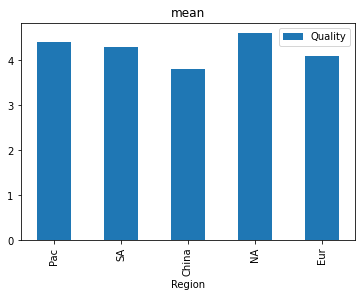

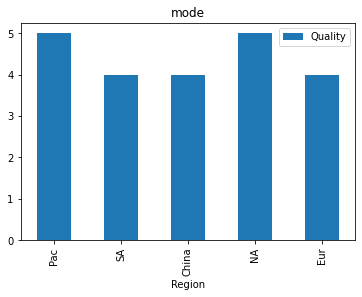

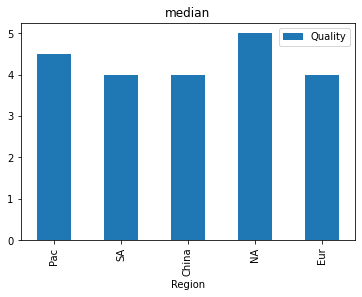

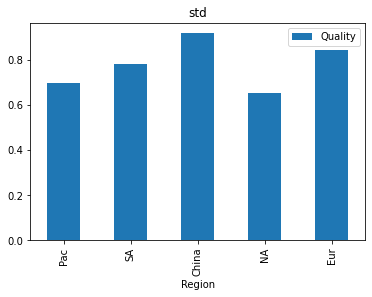

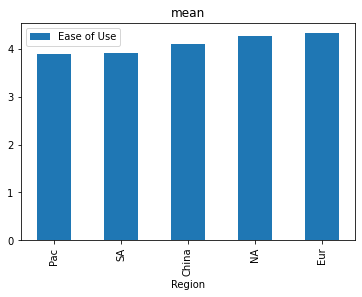

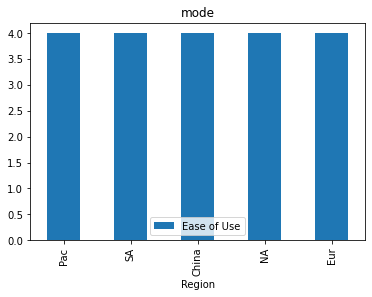

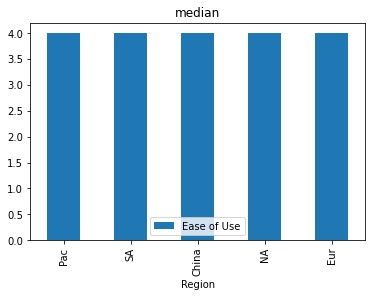

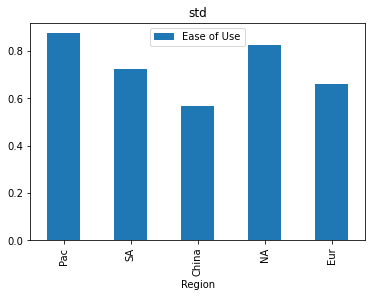

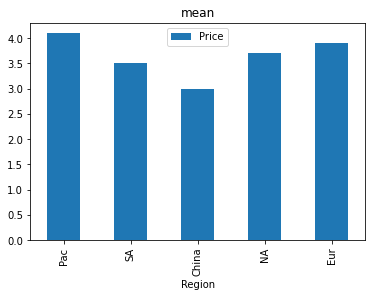

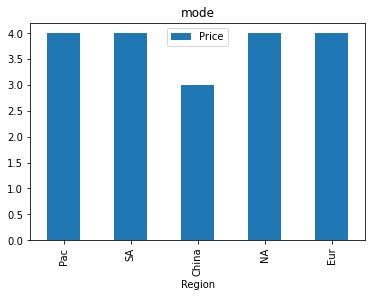

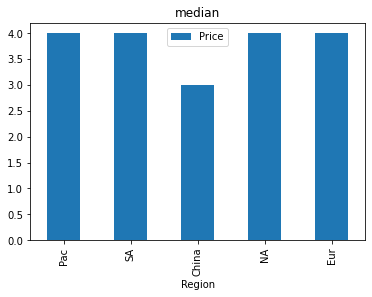

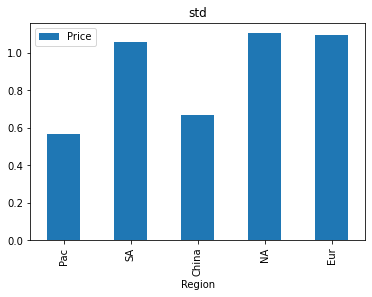

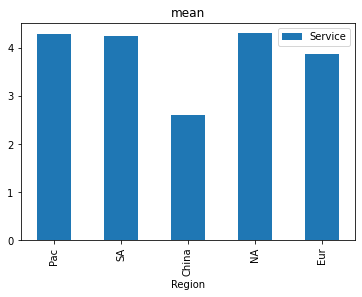

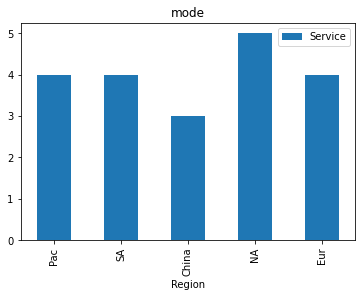

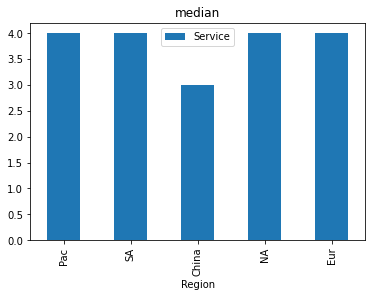

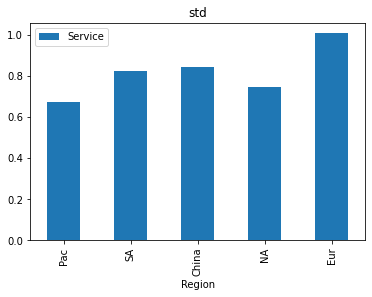

In [40]:
for item in ['Quality', 'Ease of Use', 'Price', 'Service']:
    for func in ['mean', 'mode', 'median', 'std']:
        df = pd.DataFrame()
        for region in region_set:
            print(f'In the region codenamed "{region}", the {item}\'s statistical indicators "{func}" is {f(region, item, func)}')
            oneline = pd.DataFrame([[region,  f(region, item, func)]], columns=['Region', item])
            df = pd.concat([df, oneline])
        
        df.set_index(df['Region'], inplace=True)
        # print(df)
        df.plot(kind='bar', title=func)
        print('')
    print('------------------')

